In [63]:
import numpy as np # linear algebra
import pandas as pd # data manipulation and analysis
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
sns.set_style('whitegrid') # set style for visualization
import warnings # ignore warnings
warnings.filterwarnings('ignore')
import requests, zipfile, io
from sklearn.impute import KNNImputer

url = "https://github.com/devtlv/Datasets-DA-Bootcamp-2-/raw/refs/heads/main/Week%205%20-%20Data%20Processing/W5D2%20-%20bis/Marvel%20Cinematic%20Universe%20Box%20Office%20Dataset%20Folder.zip"

r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("data")

# Loading and Understanding the Dataset

In [64]:
# Loading Dataset
df = pd.read_csv('.\data\mcu_box_office.csv')

print(df.head(), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   movie_title           27 non-null     object
 1   mcu_phase             27 non-null     int64 
 2   release_date          27 non-null     object
 3   tomato_meter          27 non-null     int64 
 4   audience_score        27 non-null     int64 
 5   movie_duration        27 non-null     int64 
 6   production_budget     27 non-null     object
 7   opening_weekend       27 non-null     object
 8   domestic_box_office   27 non-null     object
 9   worldwide_box_office  27 non-null     object
dtypes: int64(4), object(6)
memory usage: 2.2+ KB
                          movie_title  mcu_phase release_date  tomato_meter  \
0                            Iron Man          1     5/2/2008            94   
1                 The Incredible Hulk          1    6/13/2008            67   
2         

In [65]:
# Understanding the Dataset
df_numeric = df.select_dtypes(include='int64')
df_categorical = df.drop(columns=df_numeric.columns)

# Numeric Columns
print(df_numeric.describe())

# Other Columns
for col in df_categorical:
    print(df_categorical[col].value_counts(), '\n')


       mcu_phase  tomato_meter  audience_score  movie_duration
count  27.000000     27.000000       27.000000       27.000000
mean    2.481481     83.555556       83.740741      131.925926
std     1.014145     11.112479       11.002072       15.531422
min     1.000000     47.000000       45.000000      111.000000
25%     2.000000     79.000000       78.000000      122.500000
50%     3.000000     87.000000       87.000000      130.000000
75%     3.000000     91.500000       91.000000      138.000000
max     4.000000     96.000000       98.000000      181.000000
movie_title
Iron Man                                     1
The Incredible Hulk                          1
Iron Man 2                                   1
Thor                                         1
Captain America: The First Avenger           1
The Avengers                                 1
Iron Man 3                                   1
Thor: The Dark World                         1
Captain America: The Winter Soldier          

# Cleaning Data

In [66]:
# Converting Datatypes of Columns
# Release-Date Column to Datetime
df['release_date'] = pd.to_datetime(df['release_date'])

# Converting Production Budget, Opening Weekend, Domestic/Worldwide Boxoffice to int
for col in ['production_budget', 'opening_weekend', 'domestic_box_office', 'worldwide_box_office']:  # Loop through the specific columns
    df[col] = df[col].str.replace(',', '', regex=True).astype(int) # Remove commas and convert to int

# Convert mcu_phase to 'categorical'
df['mcu_phase'] = df['mcu_phase'].astype('category')

# Check Updated Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   movie_title           27 non-null     object        
 1   mcu_phase             27 non-null     category      
 2   release_date          27 non-null     datetime64[ns]
 3   tomato_meter          27 non-null     int64         
 4   audience_score        27 non-null     int64         
 5   movie_duration        27 non-null     int64         
 6   production_budget     27 non-null     int64         
 7   opening_weekend       27 non-null     int64         
 8   domestic_box_office   27 non-null     int64         
 9   worldwide_box_office  27 non-null     int64         
dtypes: category(1), datetime64[ns](1), int64(7), object(1)
memory usage: 2.3+ KB


# Exercise 1: Visualizing Movie Durations

<Figure size 1000x600 with 0 Axes>

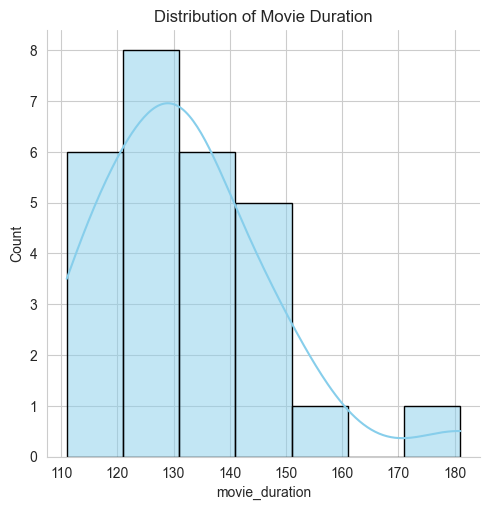

In [67]:
# Create a distribution plot to visualize the durations of MCU movies
plt.figure(figsize=(10,6))
sns.displot(df['movie_duration'], color='skyblue', kde=True, edgecolor='black')
plt.title('Distribution of Movie Duration')
plt.xticks()
plt.show()

# Exercise 2: Box Plot of Audience and Tomato Meter Scores

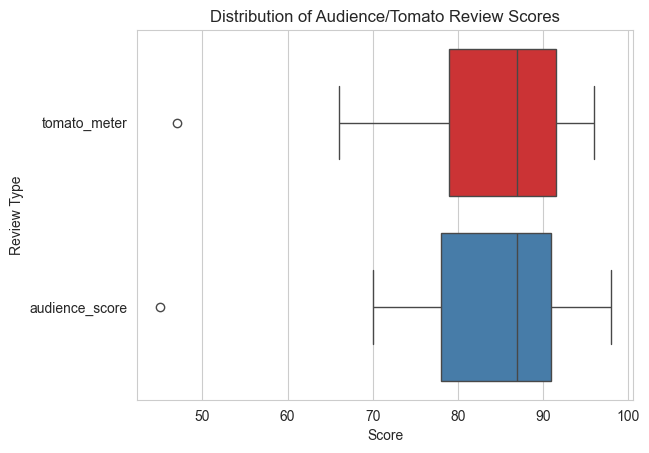

In [70]:
# Melt the Dataframe into Long Form
df_long = pd.melt(
    df,
    id_vars=['movie_title', 'mcu_phase', 'release_date'],
    value_vars=[
        'movie_duration',
        'production_budget',
        'opening_weekend',
        'domestic_box_office',
        'worldwide_box_office',
        'tomato_meter',
        'audience_score'],
    var_name='metric',
    value_name='value'
)

# Filter to Only Retrieve Rows with Review Scores
df_reviews = df_long[df_long["metric"].isin(["tomato_meter", "audience_score"])]

# Show the Boxplots
sns.boxplot(df_reviews, x='value', y='metric', orient='h', palette='Set1')
plt.title('Distribution of Audience/Tomato Review Scores')
plt.xlabel('Score')
plt.ylabel('Review Type')
plt.show()

# Exercise 3: Pair Plot of Financial Data

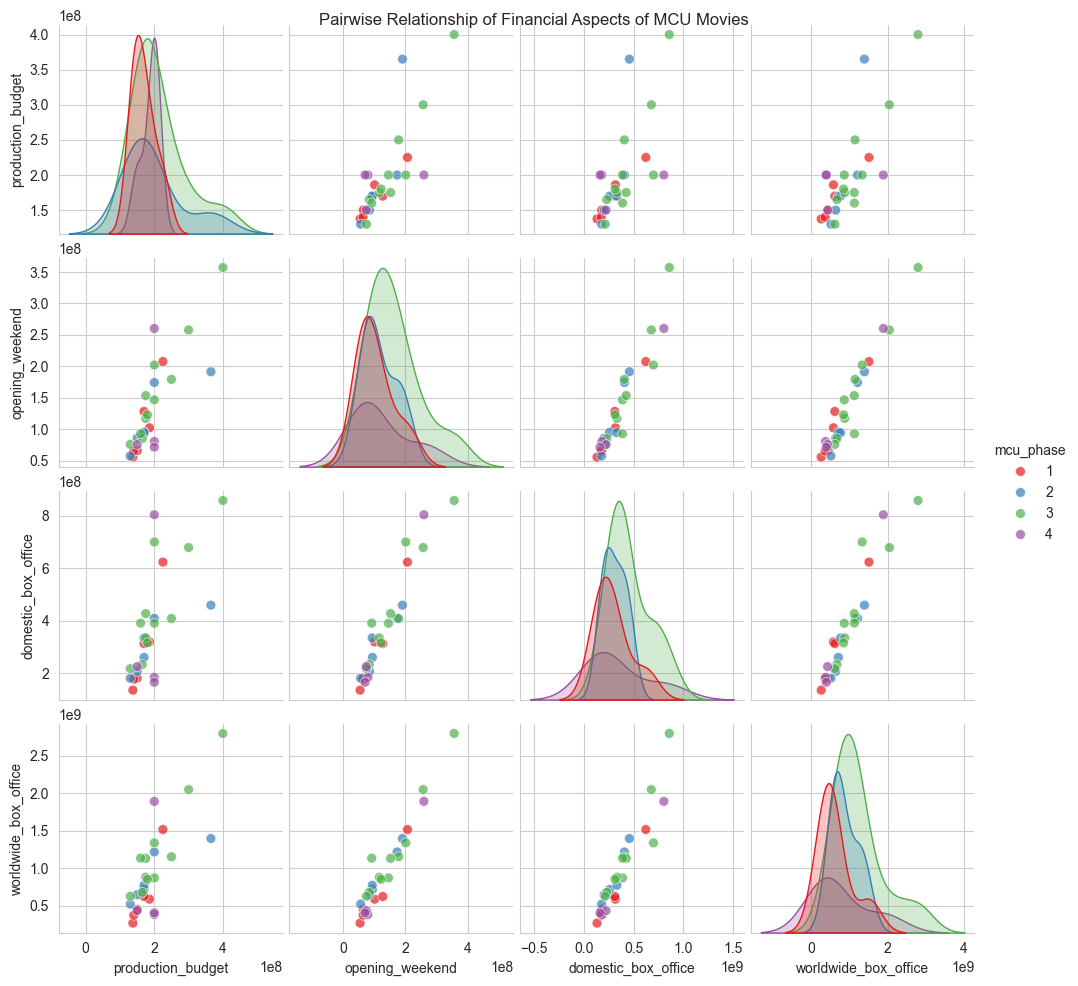

In [88]:
# Select only the Relevant Columns to the Analysis
cols = ['production_budget', 'opening_weekend', 'domestic_box_office', 'worldwide_box_office', 'mcu_phase']
df_subset = df[cols].copy()

# Columns Were Converted to Numeric During Data Cleaning
# Create the Pair Plot
g = sns.pairplot(
    df_subset,
    hue='mcu_phase',
    palette='Set1',
    diag_kind='kde',
    kind='scatter',
    plot_kws={'alpha':0.7, 's':50},  # transparency & size for points
    height=2.5
)

g.fig.suptitle('Pairwise Relationship of Financial Aspects of MCU Movies')
plt.show()

# Exercise 4: Heatmap of Correlation Between Financial Metrics

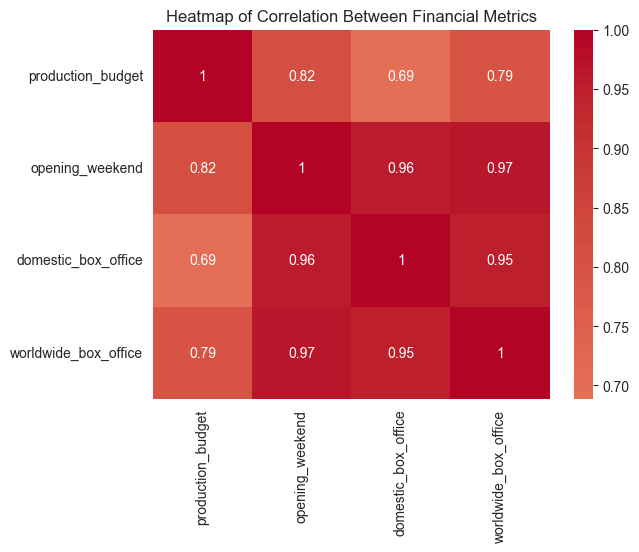

In [ ]:
# Select only the relevant columns
cols = ['production_budget', 'opening_weekend', 'domestic_box_office', 'worldwide_box_office']

# Calculate Correlation Matrix
corr_matrix = df[cols].corr()

# Create Heatmap using Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Correlation Between Financial Metrics')
plt.show()

# Exercise 5: Line Plot of Box Office Trends Over Time

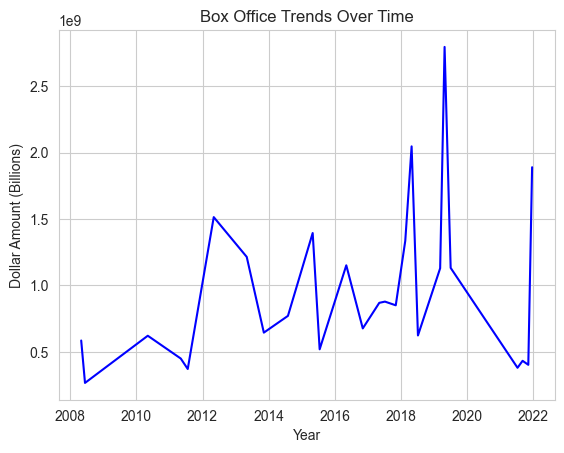

In [82]:
# Sort the Dataframe by release date
df_sorted = df.sort_values('release_date')

# Create Linegraph to Analyze Box Office Trends Over Time
sns.lineplot(df_sorted, x='release_date', y='worldwide_box_office', color='blue')
plt.title('Box Office Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Dollar Amount (Billions)')
plt.show()

# Exercise 6: Violin Plot of Movie Durations by MCU Phase

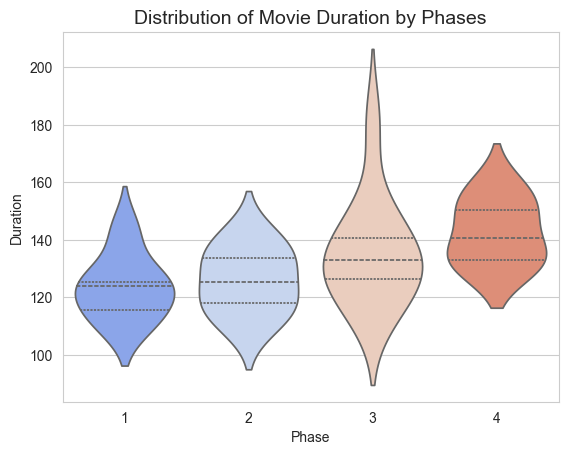

In [86]:
# Violin Plot 
sns.violinplot(df, x='mcu_phase', y='movie_duration', palette='coolwarm', inner='quartile', bw=0.7)
plt.title('Distribution of Movie Duration by Phases', fontsize=14)
plt.xlabel('Phase')
plt.ylabel('Duration')
plt.show()